### 神经网络中的非线性矫正

In [81]:
import numpy as np
import matplotlib.pyplot as plt

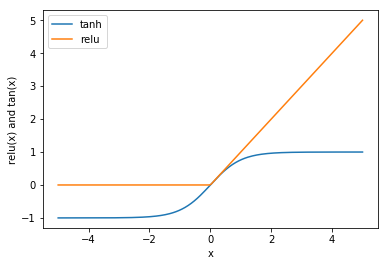

In [82]:
#等差数列
line = np.linspace(-5,5,200)
#非线性矫正的图示
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')
#图注位置
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x) and tan(x)')
#显示图形
plt.show()

In [83]:
#MLP算法：多层感知器，前馈神经网络（调参：增加层数，增加节点数）
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [84]:
#数据加载
wine = load_wine()
X = wine.data[:,:2]
y = wine.target

In [85]:
#数据拆分
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [86]:
#定义分类器，层数默认为100个
mlp = MLPClassifier(solver='lbfgs')
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [87]:
def draw_mlp_pic(X,y,X_train,mlp):
    cmap_light = ListedColormap(['#FFAAAA','#AAFFAA',"#AAAAFF"])
    cmap_light = ListedColormap(['#FF0000','#00FF00',"#0000FF"])
    x_min,x_max = X_train[:,0].min()-1,X_train[:,0].max()+1
    y_min,y_max = X_train[:,1].min()-1,X_train[:,1].max()+1
    #meshgrid函数用两个坐标轴上的点在平面上画网格
    xx,yy = np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
    #预测,ravel()将多维数组降位一维,c_将切片对象转换为沿第二轴的连接
    z = mlp.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    #绘制分类图
    plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
    #绘制散点图
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.spring,edgecolor='k')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title("MLPClassifier:solver=lbfgs")
    #plt.scatter(6.75,4.82,marker='*',c='green',s=200)
    plt.show()

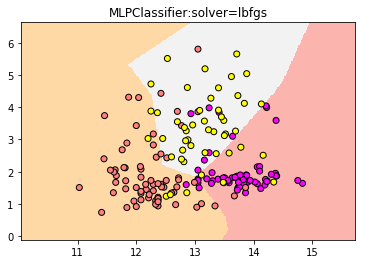

In [88]:
draw_mlp_pic(X,y,X_train,mlp)

In [89]:
#定义分类器，10层
#activation将隐藏单元非线性化，默认relu，还有identity不作处理,logistic逻辑回归，映射到[-1,1],tanh类似逻辑回归处理
#hidden_layer_sizes 神经网络层数，10层
#alpha L2正则化惩罚
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

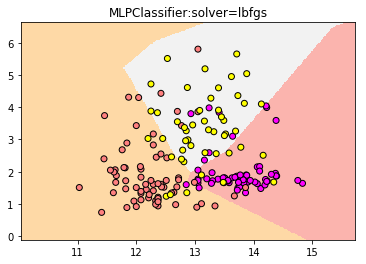

In [90]:
#节点数减少，丢失很多细节，趋向于欠拟合
draw_mlp_pic(X,y,X_train,mlp)

In [91]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

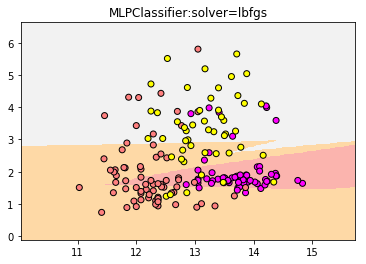

In [92]:
#边界更细腻
draw_mlp_pic(X,y,X_train,mlp)

In [93]:
#alpha 越大会增加模型的正则化程度，模型越简单，倾向于欠拟合
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10,10],activation='tanh',alpha=5)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [ ]:
#边界更细腻
draw_mlp_pic(X,y,X_train,mlp)

### 手写识别

In [ ]:
from sklearn.datasets import fetch_mldata

In [ ]:
#数据量过大，读取会超时
minst = fetch_mldata('MNIST original')
minst

In [74]:
X = minst.data/255.
y = minst.target
X_train,X_test,y_train,y_test = train_test_split(X,y)

NameError: name 'minst' is not defined

In [ ]:
mlp_hw = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[100,100],activation='relu',alpha=1e-5,random_state=62)

In [ ]:
mlp_hw.fit(X_train,y_train)

In [ ]:
print(mlp_hw.score(X_test,y_test))